__Attrition Rate Analysis__

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder


from warnings import filterwarnings
filterwarnings('ignore')


# Reading Dataset

In [2]:
data = pd.read_csv('general_data.csv')

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


- Target variable - Attrition is Binary Categorical

In [3]:
data.shape                     # Checking Shape of dataset

(4410, 24)

In [4]:
data.info()                    # Checking information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [5]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Missing value treatment

In [6]:
data.isnull().sum()             # Checking for Null values

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna(11.28)        # Replacing null values by mean value (11.28)     

In [7]:
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].fillna(2)          # Replacing null values by median value (11.28)     

In [8]:
data.isnull().sum()             # Checking for further Null values in dataset

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

______________

# Plotting Histogram

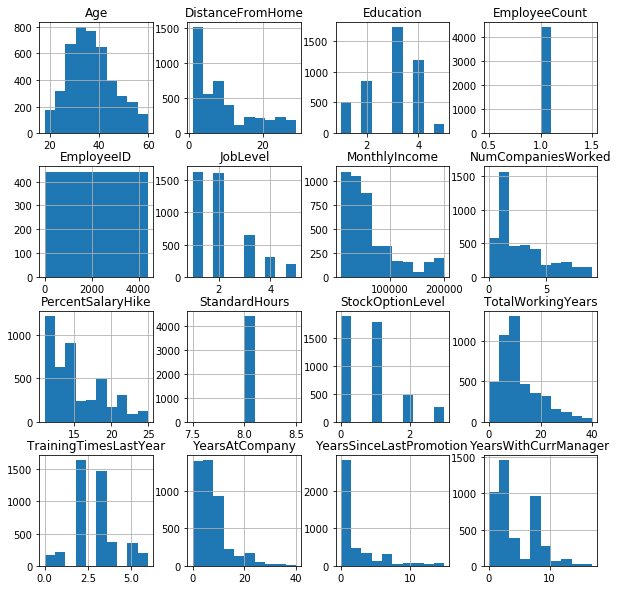

In [9]:
data.hist(figsize=(10,10))
plt.show()


- __Inference from Histogram__-

•	Education, JobLevel, StockOptional Level are Categorical Variables which are in Encoded format

•	Standard Hours, Employee Count, Employee ID are irrelevent columns


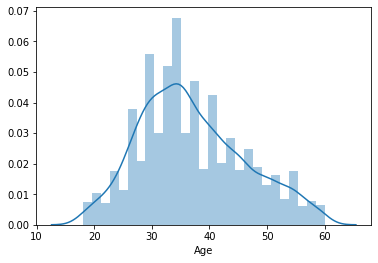

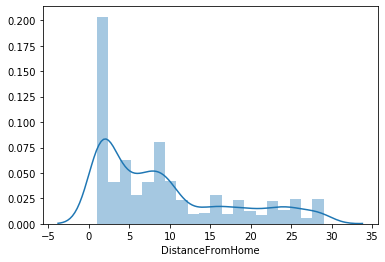

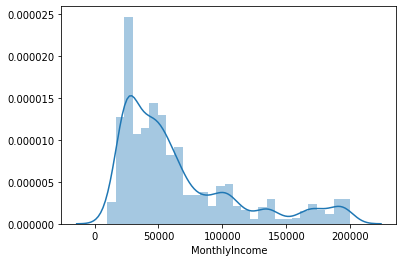

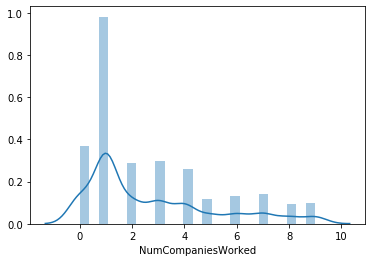

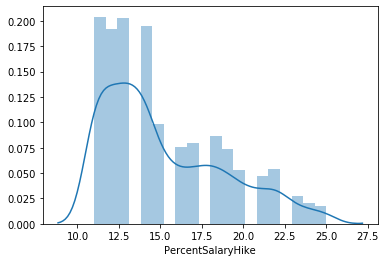

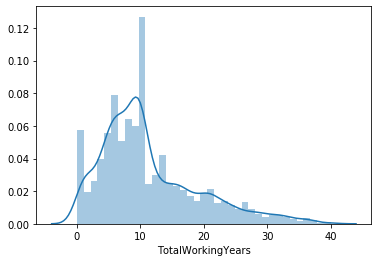

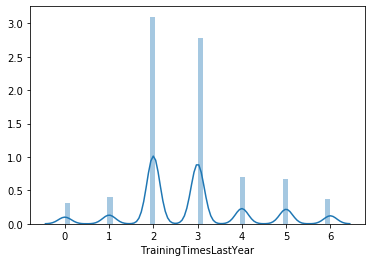

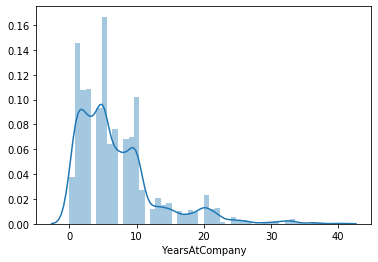

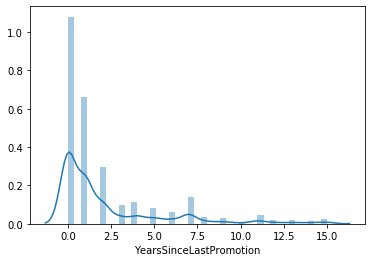

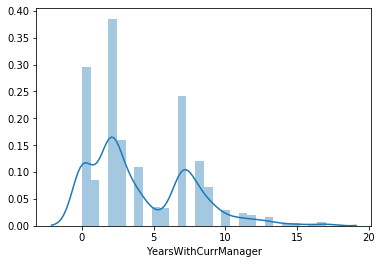

In [10]:
columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in columns:
    sns.distplot(data[col])
    plt.show()


- __Inference from Distplot__ - 

•	Age, NumCompanies Worked, PercentSalaryHike, TotalWorking Years, YearsSinceLastPromotion is Unimodal

•	Distance from Home is Bimodal

•	Monthly Income, TrainingtimesLastYear, YearsAtCompany, YearswithCurrManager is Multimodal


# Outliers Treatment

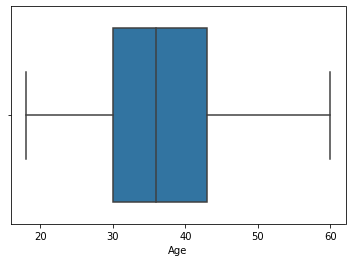

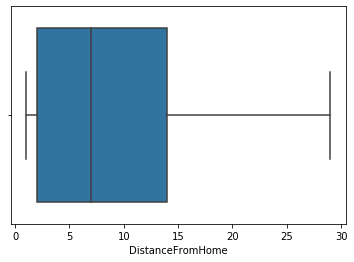

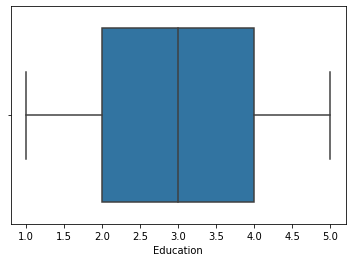

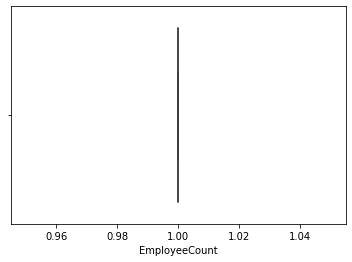

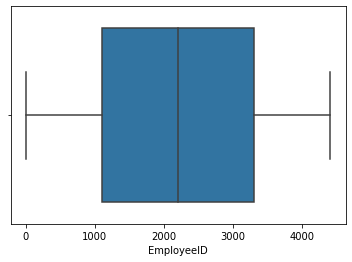

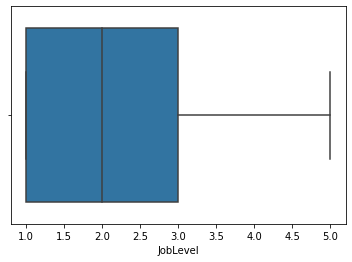

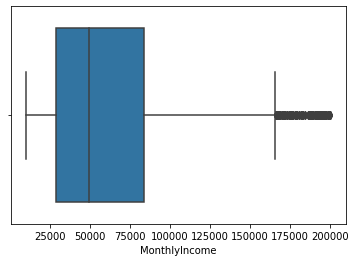

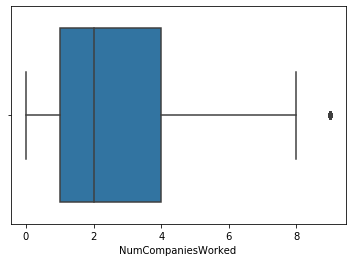

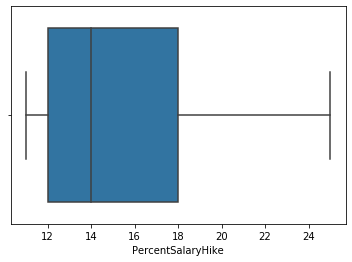

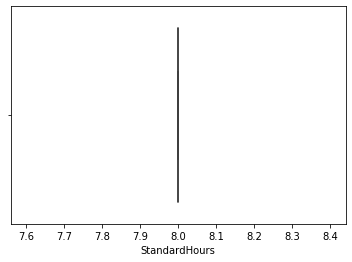

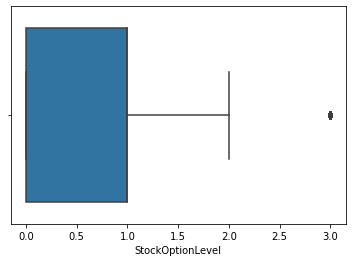

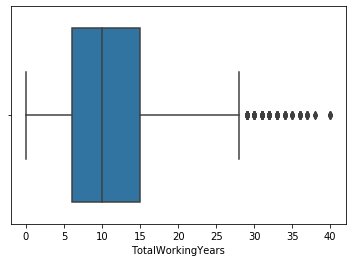

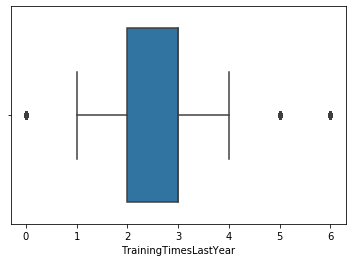

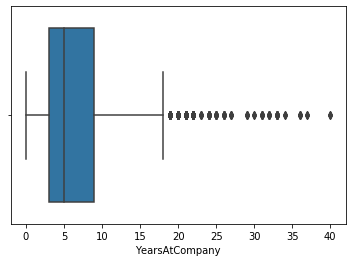

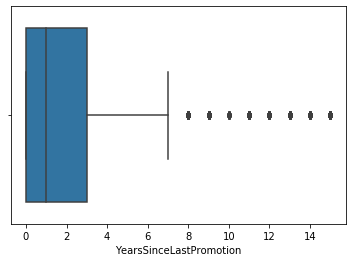

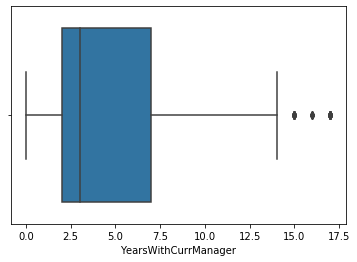

In [11]:
col = ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID','JobLevel','MonthlyIncome', 
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours','StockOptionLevel',
       'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for each in col:
    sns.boxplot(data[each])
    plt.show()




- __Inference from BoxPlots__-

- Box Plot is plotted for all the Continous Variable

•	Age, DistanceFromHome, Education, EmployeeID, JobLevel, PercentSalaryHike - Don't have any outliers

•	NumCompaniesWorked, StockOptionLevel has Single Outliers

•	MonthlyIncome has Many Outliers

•	TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion - have Moderate outliers

•	TrainingTimesLastYear, YearsWithCurrManager - have some outliers

•	EmployeeCount , StandardHours - just have a line, both are the irrelevant columns from this attrition dataset


# Conversion of Text features to categorical - using LabelEncoder() 

In [12]:
# from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
data['Over18'] = label_encoder.fit_transform(data['Over18'])

In [13]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


# Droping unnecessary Columns from dataset

In [14]:
data = data.drop(['EmployeeID','EmployeeCount', 'Over18','StandardHours'], axis=1)

In [15]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [16]:
data.shape

(4410, 20)

# Splitting the dataset

In [17]:
y = data.iloc[:,1:2]

y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [23]:
x = data.drop(['Attrition'], axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [24]:
x.shape

(4410, 19)


# Application Of Decision Tree Model

In [18]:
from sklearn import tree
from sklearn import preprocessing

In [19]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [20]:
data.shape

(4410, 20)

In [25]:
x.shape

(4410, 19)

# Train the model using decision Tree

In [26]:
model = tree.DecisionTreeClassifier()
model.fit(x,y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

##### Predicting Score

In [27]:
model.score(x,y)

1.0

__Note__ : Seems to be Data is Overfitted as accuracy is 100%

# Application of Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [30]:
rf_model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

##### Checking Score

In [31]:
print("OOB Accuracy:")
print(rf_model.oob_score_);

OOB Accuracy:
0.9997732426303855


# Finding the Most Relevent Column to predict the Attrition

In [32]:
a = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','Education', 'EducationField', 'Gender', 'JobLevel', 
     'JobRole','MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel',
     'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']


In [33]:
for feature,imp in zip(a, rf_model.feature_importances_):
    print(feature,"\t\t :",imp);


Age 		 : 0.0973413852911921
BusinessTravel 		 : 0.0278527911672691
Department 		 : 0.026104505606348097
DistanceFromHome 		 : 0.07008649505065886
Education 		 : 0.040564312634794875
EducationField 		 : 0.041558976073355354
Gender 		 : 0.018762603783008612
JobLevel 		 : 0.03728535024772645
JobRole 		 : 0.05591905764599922
MaritalStatus 		 : 0.03935675435814599
MonthlyIncome 		 : 0.09369338768788922
NumCompaniesWorked 		 : 0.05548874185834994
PercentSalaryHike 		 : 0.06591669514363133
StockOptionLevel 		 : 0.034534649719902034
TotalWorkingYears 		 : 0.0851704987947265
TrainingTimesLastYear 		 : 0.04516004887200352
YearsAtCompany 		 : 0.06704761318807657
YearsSinceLastPromotion 		 : 0.04315373390687803
YearsWithCurrManager 		 : 0.05500239897004408


- __Inference__

Age, DistanceFromHome, MonthlyIncome, PercentSalaryHike, TotalWorkingYears, YearsAtCompany have value more than 0.05 ie, They are Important feature and affect the prediction of Attrition


# Splitting Dataset according to Important Columns

In [32]:
imp = data[['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']]
imp.head()


,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany
0,51,6,131160,11,1.0,1
1,31,10,41890,23,6.0,5
2,32,17,193280,15,5.0,5
3,38,2,83210,11,13.0,8
4,32,10,23420,12,9.0,6


# Fitting Decision Tree

In [44]:
model = tree.DecisionTreeClassifier(max_depth=12)
model.fit(imp,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Creating a Model

In [46]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


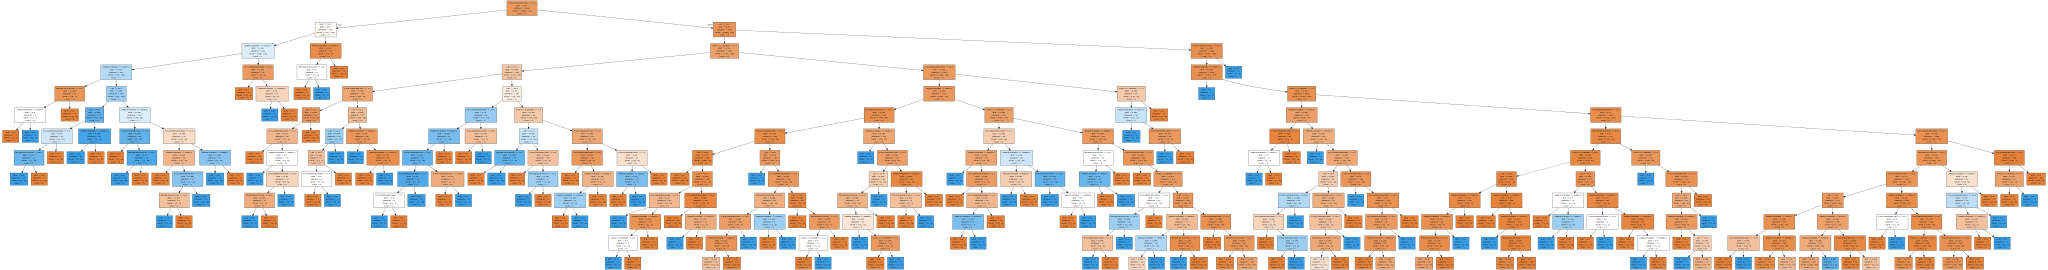

In [47]:
graph = Source(tree.export_graphviz(model, out_file=None, 
feature_names=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany'],
                class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

In [48]:
# Predicting Score

model.score(imp,y)

0.9480725623582766

Random Forest

In [39]:
rf_model.fit(imp,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

Accuracy Score

In [40]:
print("OOB Accuracy:")
print(rf_model.oob_score_);

OOB Accuracy:
0.999546485260771


Conclusion:

•	The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns.

•	The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)
